In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import re
from collections import Counter
import random

In [ ]:
movies = pd.read_csv("../data/dataset.csv")
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [112]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [113]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [114]:
movies.isnull().sum()

,0
id,0
title,0
genre,3
original_language,0
overview,13
popularity,0
release_date,0
vote_average,0
vote_count,0


In [115]:
# Normalize text (case-insensitive, clean punctuation)
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\\s]", " ", text)  # keep only alphanumeric
    return text.strip()

# Combine features into single 'tags' column
movies['tags'] = (
    movies['genre'].fillna('') + " " +
    movies['overview'].fillna('')
)

movies['tags'] = movies['tags'].apply(clean_text)

# Drop duplicates
movies = movies.drop_duplicates(subset=['title']).reset_index(drop=True)

In [116]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,drama crime framed in the 1940s for the double...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,comedy drama romance raj is a rich carefree ...
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,drama crime spanning the years 1945 to 1955 a...
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,drama history war the true story of how busine...
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,drama crime in the continuing saga of the corl...


In [117]:
df = movies[["id",'title','genre','overview','tags']]

In [118]:
df.head()

,id,title,genre,overview,tags
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...,drama crime framed in the 1940s for the double...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second...",comedy drama romance raj is a rich carefree ...
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o...",drama crime spanning the years 1945 to 1955 a...
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...,drama history war the true story of how busine...
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,drama crime in the continuing saga of the corl...


In [119]:
df.drop(columns = ["genre","overview"], inplace =True)
df

/tmp/ipython-input-3121890008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["genre","overview"], inplace =True)


,id,title,tags
0,278,The Shawshank Redemption,drama crime framed in the 1940s for the double...
1,19404,Dilwale Dulhania Le Jayenge,comedy drama romance raj is a rich carefree ...
2,238,The Godfather,drama crime spanning the years 1945 to 1955 a...
3,424,Schindler's List,drama history war the true story of how busine...
4,240,The Godfather: Part II,drama crime in the continuing saga of the corl...
...,...,...,...
9656,168098,Cell,horror science fiction thriller when a strange...
9657,10196,The Last Airbender,action adventure fantasy the story follows the...
9658,331446,Sharknado 3: Oh Hell No!,action tv movie science fiction comedy adventu...
9659,13995,Captain America,action science fiction war during world war ii...


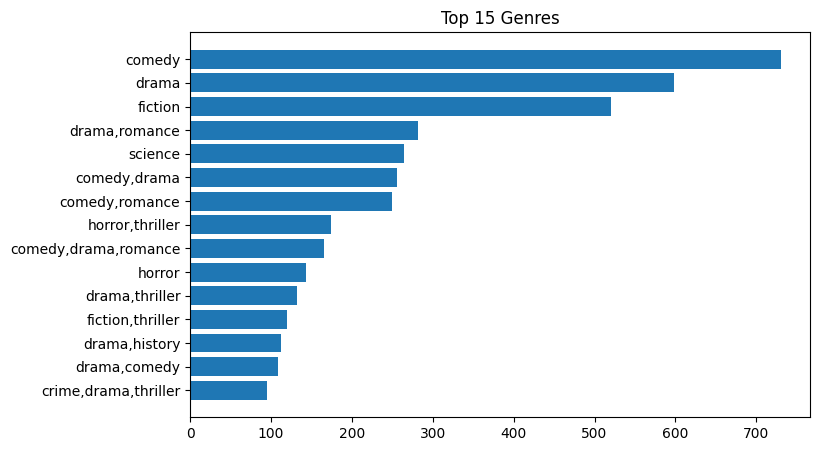

In [120]:
genres = " ".join(movies['genre'].fillna("").astype(str)).lower().split()
counts = Counter(genres).most_common(15)

plt.figure(figsize=(8,5))
plt.barh([g for g,_ in counts], [c for _,c in counts])
plt.gca().invert_yaxis()
plt.title("Top 15 Genres")
plt.show()


In [121]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(movies['tags']).toarray()

similarity = cosine_similarity(vectors)
print("Similarity matrix shape:", similarity.shape)

Similarity matrix shape: (9661, 9661)


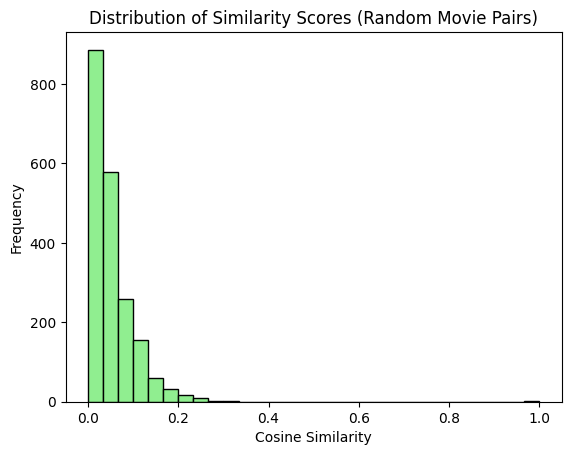

In [122]:
pairs = [similarity[random.randint(0,len(movies)-1)][random.randint(0,len(movies)-1)] for _ in range(2000)]
plt.hist(pairs, bins=30, color="lightgreen", edgecolor="black")
plt.title("Distribution of Similarity Scores (Random Movie Pairs)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [123]:
df[df["title"]=="The Shawshank Redemption"]

,id,title,tags
0,278,The Shawshank Redemption,drama crime framed in the 1940s for the double...


In [124]:
dist = sorted(list(enumerate(similarity[0])),reverse = True,key = lambda vec:vec[1])

In [125]:
dist

[(0, np.float64(0.9999999999999999)),
 (2957, np.float64(0.30618621784789724)),
 (3602, np.float64(0.2795084971874737)),
 (696, np.float64(0.27277236279499045)),
 (1006, np.float64(0.2721655269759087)),
 (9207, np.float64(0.2525907427704613)),
 (7294, np.float64(0.25253813613805265)),
 (3661, np.float64(0.24618298195866548)),
 (2582, np.float64(0.24514516892273003)),
 (4339, np.float64(0.24268133584853774)),
 (881, np.float64(0.23717082451262844)),
 (4732, np.float64(0.23622779563076698)),
 (9488, np.float64(0.23622779563076698)),
 (2602, np.float64(0.2357022603955158)),
 (2929, np.float64(0.23249527748763854)),
 (4005, np.float64(0.23014365447458085)),
 (2108, np.float64(0.22821773229381917)),
 (1219, np.float64(0.22821773229381914)),
 (1036, np.float64(0.22613350843332267)),
 (723, np.float64(0.22360679774997896)),
 (5330, np.float64(0.2222502222503334)),
 (4139, np.float64(0.22225022225033336)),
 (4424, np.float64(0.22097086912079608)),
 (1260, np.float64(0.22086305214969307)),
 (55

In [126]:
for i in dist[0:5]:
  print(df.iloc[i[0]].title)

The Shawshank Redemption
Brubaker
The Woodsman
Cool Hand Luke
A Prophet


In [127]:
def recommend(movie_name, top_k=5):
    movie_name = movie_name.lower().strip()
    titles = movies['title'].str.lower().tolist()

    # Fuzzy match for close names
    best_match = get_close_matches(movie_name, titles, n=1, cutoff=0.6)
    if not best_match:
        return f"❌ Sorry, '{movie_name}' not found in dataset."

    idx = titles.index(best_match[0])
    distances = similarity[idx]
    movie_list = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:top_k+1]

    return [movies.iloc[i[0]].title for i in movie_list]


In [128]:
recommend("avengers")

['Allegiant',
 'The Humanity Bureau',
 'Marvel One-Shot: The Consultant',
 'Kingsman: The Golden Circle',
 'The Matrix Resurrections']

In [129]:
def mean_max_similarity(sample=100, k=5):
    scores = []
    choices = np.random.choice(len(movies), size=min(sample, len(movies)), replace=False)
    for idx in choices:
        sims = similarity[idx]
        top_idx = sims.argsort()[-k-1:-1]
        scores.append(np.mean(sims[top_idx]))
    return np.mean(scores)

print("Mean Max Similarity:", mean_max_similarity())


Mean Max Similarity: 0.3094383865314789


In [130]:
def coverage_at_k(k=5, sample=500):
    covered = set()
    choices = np.random.choice(len(movies), size=min(sample, len(movies)), replace=False)
    for idx in choices:
        sims = similarity[idx]
        top_idx = sims.argsort()[-k-1:-1]  # exclude self
        covered.update(top_idx)
    return len(covered) / len(movies)

print("Coverage@5:", coverage_at_k(5))


Coverage@5: 0.17037573750129387


In [131]:
def intra_list_diversity(movie_idx, k=5):
    sims = similarity[movie_idx]
    top_idx = sims.argsort()[-k-1:-1]
    sub_sim = similarity[np.ix_(top_idx, top_idx)]
    upper = sub_sim[np.triu_indices_from(sub_sim, 1)]
    return 1 - np.mean(upper) if len(upper) else 0

ild_scores = [intra_list_diversity(i, k=5) for i in range(100)]
print("Average ILD@5:", np.mean(ild_scores))


Average ILD@5: 0.7363457212009382
